In [1]:
import scipy
import sklearn
from sklearn.feature_extraction import image
from scipy.io import loadmat
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from PIL import Image


In [3]:
numbers = ["%02d" % (x+1) for x in range(10)]
for num in numbers:
    mat_file = './2015_BOE_Chiu/Subject_'+num+'.mat'
    images = loadmat(mat_file,variable_names='images',appendmat=True).get('images')
    mask1 = loadmat(mat_file,variable_names='manualFluid1',appendmat=True).get('manualFluid1')
    mask2 = loadmat(mat_file,variable_names='manualFluid2',appendmat=True).get('manualFluid2')
    # layers1 = loadmat(mat_file,variable_names='manualLayers1',appendmat=True).get('manualLayers1')
    # layers2 = loadmat(mat_file,variable_names='manualLayers2',appendmat=True).get('manualLayers2')
    DME = loadmat(mat_file,variable_names='automaticFluidDME',appendmat=True).get('automaticFluidDME')
    idx = np.where(~np.isnan(DME[0][0]))[0]
    mask2_clipped = np.clip(mask2,0,1)
    
    img_path = './Dataset/images/'
    lbl_path = './Dataset/labels/'
    for i in idx:
        # save image
        im = Image.fromarray(images[:,:,i])
        im.save(img_path+num+'_'+str(i)+'.png')
        # save label
        np.savetxt(lbl_path+num+'_'+str(i)+'.txt',mask2_clipped[:,:,i].astype(int),fmt='%s')
        
        # imgplot = plt.imshow(mask1[:,:,i])
        # plt.show()
        # # 
        # imgplot = plt.imshow(mask2[:,:,i])
        # plt.show()
        # # 
        # imgplot = plt.imshow(DME[:,:,i])
        # plt.show()
    
    


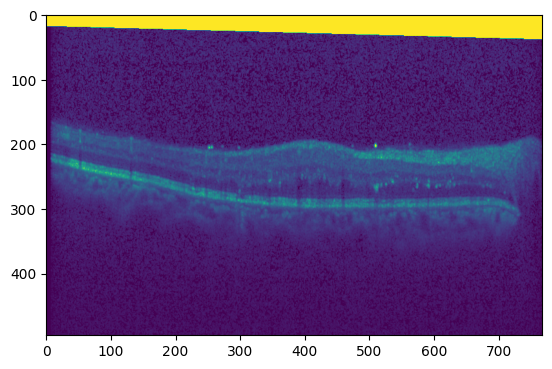

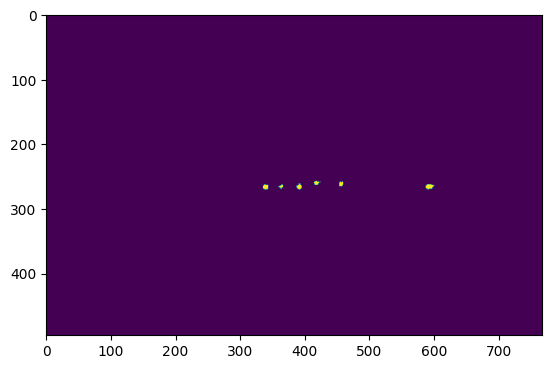

In [28]:
imgplot = plt.imshow(images[:,:,40])
plt.show()
imgplot = plt.imshow(mask2_clipped[:,:,40])
plt.show()

In [25]:
# define dataset root and directory for images and annotations
data_root = 'Dataset'
img_dir = 'images'
ann_dir = 'labels'
# define class and palette for better visualization
classes = ('background', 'object')
palette = [[0,0,255], [255,0,0]]

In [26]:
import os.path as osp
import numpy as np
from PIL import Image
import mmengine

# convert dataset annotation to semantic segmentation map
for file in mmengine.scandir(osp.join(data_root, ann_dir), suffix='.txt'):
  seg_map = np.loadtxt(osp.join(data_root, ann_dir, file)).astype(np.uint8)
  seg_img = Image.fromarray(seg_map).convert('P')
  seg_img.putpalette(np.array(palette, dtype=np.uint8))
  seg_img.save(osp.join(data_root, ann_dir, file.replace('.txt', 
                                                         '.png')))

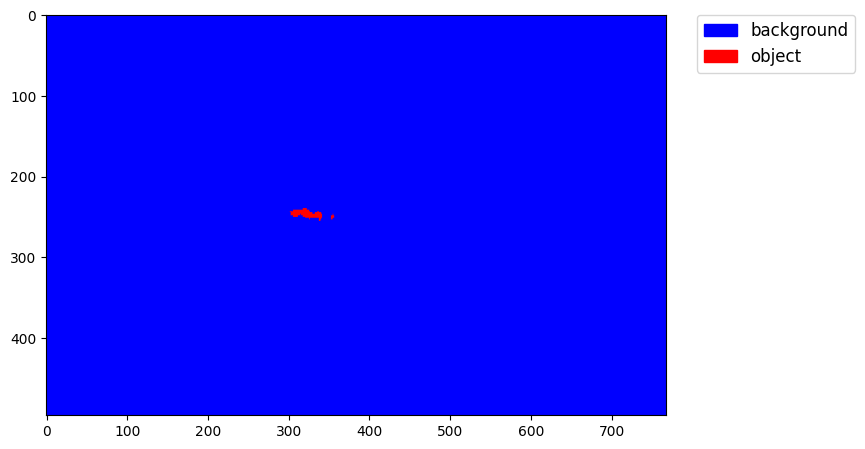

In [92]:
# Let's take a look at the segmentation map we got
import matplotlib.patches as mpatches
img = Image.open('Dataset/labels/01_40.png')
plt.figure(figsize=(8, 6))
im = plt.imshow(np.array(img.convert('RGB')))

# create a patch (proxy artist) for every color 
patches = [mpatches.Patch(color=np.array(palette[i])/255., 
                          label=classes[i]) for i in range(2)]
# put those patched as legend-handles into the legend
plt.legend(handles=patches, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., 
           fontsize='large')

plt.show()

In [93]:
# split train/val set randomly
split_dir = 'splits'
mmengine.mkdir_or_exist(osp.join(data_root, split_dir))
filename_list = [osp.splitext(filename)[0] for filename in mmengine.scandir(
    osp.join(data_root, ann_dir), suffix='.png')]
with open(osp.join(data_root, split_dir, 'train.txt'), 'w') as f:
  # select first 4/5 as train set
  train_length = int(len(filename_list)*4/5)
  f.writelines(line + '\n' for line in filename_list[:train_length])
with open(osp.join(data_root, split_dir, 'val.txt'), 'w') as f:
  # select last 1/5 as train set
  f.writelines(line + '\n' for line in filename_list[train_length:])